# Introduçãos as CNNs no Keras e ilustrações dos resultados obtidos para cada camada da DNN

Como funções de ativação, serão utilizados a função ReLU e a Sigmóide. 

**Sigmóide:**
A função sigmoide tem a forma de um "S". Ela é definida pela seguinte equação:

$$S(x) = \frac{1}{1+e^{-x}}$$

![](https://sebastianraschka.com/images/faq/logisticregr-neuralnet/sigmoid.png)

**ReLU:**
A função ReLU também chamda de fnção rampa é definida pela seguinte equação:

$$f(x) = max(0,x)$$

Simplesmente, ela é ativada caso o valor de entrada é maior que zero não alterando o mesmo, caso contrário o valor de entrada é multiplicado por zero na saída.

![](http://csci431.artifice.cc/images/relu.png)

## Importação dos Módulos

In [27]:
import numpy as np
import os

from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input

## Definição da CNN

Uma CNN pode ser construída de dois modos no Keras. Ela pode ser implementada usando a API, ou seja importa os modelos e introduzindo suas entradas e saídas, ou usando o modelo Sequential em que as camadas são postas diretamente uma abaixo da outra sem a necessidade de explicitamente indicar suas entradas e saídas. Veja os exemplos a seguir:

### Implementação pela API

In [28]:
def get_cnn_model_API(input_shape, use_bias=True):
    
    inputs = Input(input_shape, name = 'input')
    conv1 = Conv2D(n_filters, 
                   (filter_size, filter_size), 
                   #weights = [W_conv, bias_conv],
                   name = 'conv1', 
                   padding='valid',
                   use_bias=use_bias,
                   data_format="channels_first")(inputs) 
    actv1 = Activation('relu', name = 'actv1')(conv1)
    pool1 = MaxPooling2D(pool_size=(2,2), name = 'max_pool1')(actv1) 
    flat = Flatten(name = 'flat')(pool1)
    dense1 = Dense(1, 
                   #weights = [W_dense,bias_dense], 
                   name = 'dense1')(flat)
    out = Activation('sigmoid', name = 'out_sig')(dense1)

    model = Model(input=inputs, output=out)
    
    return model

### Implementação pelo modelo *Sequencial*

In [29]:
def get_cnn_model_Sequential(input_shape, use_bias=True):
       
    model = Sequential()
    
    model.add(Conv2D(n_filters, (filter_size, filter_size), 
                     #weights = [W_conv, bias_conv],
                     name = 'conv1', 
                     padding='valid',
                     use_bias=use_bias,
                     input_shape=input_shape,
                     data_format="channels_first"))
    model.add(Activation('relu', name = 'actv1'))
    model.add(MaxPooling2D(pool_size=(2, 2), name = 'max_pool1'))
    model.add(Flatten(name = 'flat'))
    model.add(Dense(1, 
                    #weights = [W_dense,bias_dense], 
                    name = 'dense1'))
    model.add(Activation('sigmoid', name = 'out_sig'))
    
    return model

# Resultados da CNN para uma dada entrada

## Definição dos parâmetros da rede

In [30]:
# Entrada
X = np.array([[[[1,0,0,0,0],
                [0,1,0,0,0],
                [0,0,-1,0,0],
                [0,0,0,-1,0],
                [0,0,0,0,1]]]])

(n_samples, n_channels, img_height, img_width) = X.shape
input_shape = (n_channels, img_height, img_width)
print(X)

[[[[ 1  0  0  0  0]
   [ 0  1  0  0  0]
   [ 0  0 -1  0  0]
   [ 0  0  0 -1  0]
   [ 0  0  0  0  1]]]]


In [31]:
# Kernel
#--------------

# número de filtros
n_filters = 3    

# comprimento e largura dos filtros
filter_size = 2 

# valor de bias
f_bias = 0.1     

#--------------

# Altera a posição das bandas do tipo last para o tipo first
def channels_l2f(mat):
    assert len(mat.shape) == 4
    return np.rollaxis(np.rollaxis(mat, 1, 4), 0, 4)

# Definição dos pesos para a camada da convolução
coluna = np.ones(shape=(filter_size,1))
linha = np.ones(filter_size * n_filters)

# (W_conv+aux) faz o broadcasting para repetir o kernel no número dado por n_filters
W_conv = (coluna + linha).reshape(n_filters, 1, filter_size, filter_size)
print("Pesos do kernel da convolução:")
print(W_conv)
W_conv = channels_l2f(W_conv)   # altera as bandas da W_conv para formato de entrada de pesos

bias_conv = np.ones(n_filters) * f_bias
print("Bias da convolução:")
print(bias_conv)

Pesos do kernel da convolução:
[[[[ 2.  2.]
   [ 2.  2.]]]


 [[[ 2.  2.]
   [ 2.  2.]]]


 [[[ 2.  2.]
   [ 2.  2.]]]]
Bias da convolução:
[ 0.1  0.1  0.1]


In [32]:
# Definição dos pesos para a camada densa
n = filter_size * filter_size * n_filters
W_dense = np.ones(shape=(n)).reshape(n,1)
print("Pesos da camada densa:")
print(W_dense)

bias_dense = np.ones(1) * f_bias
print("Bias da camanda densa:")
print(bias_dense)

Pesos da camada densa:
[[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]]
Bias da camanda densa:
[ 0.1]


In [33]:
# Formatação
np.set_printoptions(precision=3)

# Leitura do modelo
#model = get_cnn_model_API(input_shape=input_shape)
model = get_cnn_model_Sequential(input_shape=input_shape)
model.set_weights([W_conv, bias_conv, W_dense, bias_dense])

print('-'*30)
print("Número de camadas:", len(model.layers))
print('-'*30)

# Resultados para cada camada
i = 1
for layer in model.layers:
    intermediate_layer_model = Model(inputs=model.input,outputs=layer.output)
    intermediate_output = intermediate_layer_model.predict(X)
    print('-'*80)
    print("Saída da camada", i, ":", layer.name)
    print('-'*80)
    print(intermediate_output)
    i+=1

------------------------------
Número de camadas: 6
------------------------------
--------------------------------------------------------------------------------
Saída da camada 1 : conv1
--------------------------------------------------------------------------------
[[[[ 4.1  2.1  0.1  0.1]
   [ 2.1  0.1 -1.9  0.1]
   [ 0.1 -1.9 -3.9 -1.9]
   [ 0.1  0.1 -1.9  0.1]]

  [[ 4.1  2.1  0.1  0.1]
   [ 2.1  0.1 -1.9  0.1]
   [ 0.1 -1.9 -3.9 -1.9]
   [ 0.1  0.1 -1.9  0.1]]

  [[ 4.1  2.1  0.1  0.1]
   [ 2.1  0.1 -1.9  0.1]
   [ 0.1 -1.9 -3.9 -1.9]
   [ 0.1  0.1 -1.9  0.1]]]]
--------------------------------------------------------------------------------
Saída da camada 2 : actv1
--------------------------------------------------------------------------------
[[[[ 4.1  2.1  0.1  0.1]
   [ 2.1  0.1  0.   0.1]
   [ 0.1  0.   0.   0. ]
   [ 0.1  0.1  0.   0.1]]

  [[ 4.1  2.1  0.1  0.1]
   [ 2.1  0.1  0.   0.1]
   [ 0.1  0.   0.   0. ]
   [ 0.1  0.1  0.   0.1]]

  [[ 4.1  2.1  0.1  0.1]
   [ 

In [34]:
# Sumário contendo informações de cada camada da CNN, como nome, tipo de camada número de parâmetros e conexões
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 3, 4, 4)           15        
_________________________________________________________________
actv1 (Activation)           (None, 3, 4, 4)           0         
_________________________________________________________________
max_pool1 (MaxPooling2D)     (None, 3, 2, 2)           0         
_________________________________________________________________
flat (Flatten)               (None, 12)                0         
_________________________________________________________________
dense1 (Dense)               (None, 1)                 13        
_________________________________________________________________
out_sig (Activation)         (None, 1)                 0         
Total params: 28.0
Trainable params: 28.0
Non-trainable params: 0.0
_________________________________________________________________
None


## Vizualização das camadas

In [37]:
# Metodos para desenhar as saídas da rede no Jupyter Notebook
from io import BytesIO
import base64
import PIL
from IPython.display import display, Image, HTML
from PIL import ImageFont
from PIL import ImageDraw 

def get_base64_from_image(img):
    imgbuffer = BytesIO()
    img.save(imgbuffer, 'png')
    return base64.b64encode(imgbuffer.getvalue())

def build_html_images(arrays, scale, show_values=True):
    '''
    Monta a string para mostrar as imagens de uma camada em HTML
    * arrays: Deve ser um array de 3 dimensões no formato (filtros, img_height, img_width)
    * scale: escala que a imagem deve ser aumentada
    * show_values: se True mostra os valores do vetor na imagens construida
    '''
    
    #converte para valores de 0 a 255 uint8
    n_filters,h,w = arrays.shape
    dif = arrays.max()-arrays.min()
    # Evita divisão por zero
    if dif == 0:
        dif = 1
    np_img = np.copy(255*(arrays-arrays.min())/dif)
    np_img = np_img.astype('uint8')
    
    html_images = []
    for f in range(n_filters):
        # cria a imagem no PIL
        img = PIL.Image.fromarray(np_img[f,:,:])
        img = img.resize((w*scale, h*scale))

        if show_values:
            img = img.convert('RGB')

            draw = ImageDraw.Draw(img)
            for i in range(h):
                for j in range(w):
                    draw.text((j*scale, i*scale), 
                              "{:.3f}".format(float(arrays[f,i,j])).rstrip('0').rstrip('.'), 
                              font=ImageFont.load_default(), 
                              fill=(255, 0, 0))
        
        html_images.append("<img src='data:image/png;base64,{}'/>".format(get_base64_from_image(img).decode()))
    
    return html_images

def show_deep_net(model, inputs, scale=1):
    table = "<table><tr><td>Imagem de entrada</td>"
    img = build_html_images(inputs[0,:,:,:], scale)[0]
    table += "<td colspan=100>{}</td>".format(img)
    table += "</tr>"

    # Resultados para cada camada
    i = 1
    for layer in model.layers:
        intermediate_layer_model = Model(inputs=model.input,outputs=layer.output)
        intermediate_output = intermediate_layer_model.predict(inputs)
        table += "<tr><td>Camada {}: {}</td>".format(i, layer.name)
        if len(intermediate_output.shape) == 4:
            for img in build_html_images(intermediate_output[0,:,:,:], scale):
                table += "<td>{}</td>".format(img)
        else:
            n, x = intermediate_output.shape
            for img in build_html_images(intermediate_output.reshape(1,1,-1), scale):
                table += "<td colspan=100>{}</td>".format(img)

        i+=1

        table += "</tr>"
    table += "</table>"
    display(HTML(table))


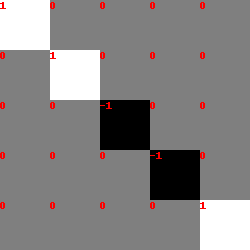
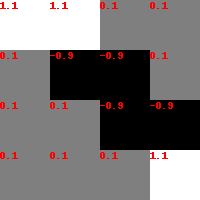
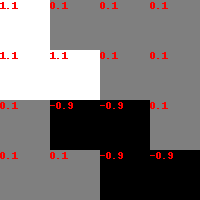
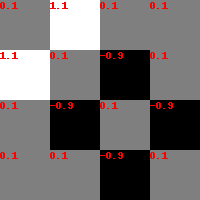
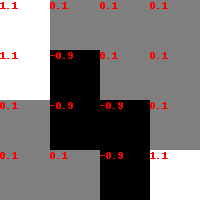
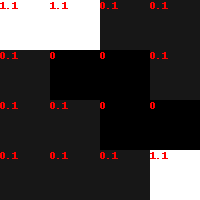
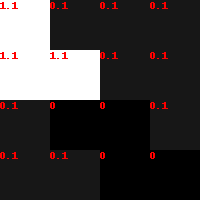
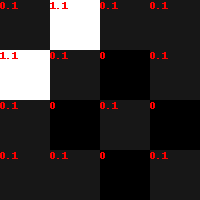
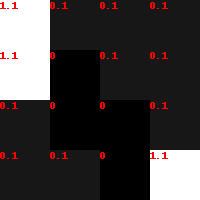
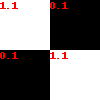
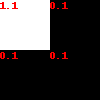
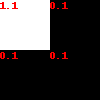
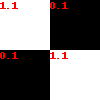
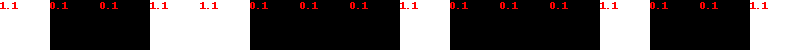
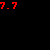
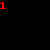

In [38]:
# Entrada
X = np.array([[[[1,0,0,0,0],
                [0,1,0,0,0],
                [0,0,-1,0,0],
                [0,0,0,-1,0],
                [0,0,0,0,1]]]])

# Kernel
W_conv = np.array([[[[0, 0],
                     [1, 1]]],

                   [[[1, 1],
                     [0, 0]]],
                   
                   [[[0, 1],
                     [1, 0]]],

                   [[[0, 1],
                     [0, 1]]]])

# valor de bias
f_bias = 0.1     


#--------------
# Essa parte é fixa

n_filters, _, f_height, f_width = W_conv.shape
filter_size = f_height

n_samples, n_channels, img_height, img_width = X.shape

input_shape = (n_channels, img_height, img_width)


#--------------
# Bias para a convolução
bias_conv = np.ones(n_filters) * f_bias

#--------------
# Camada densa

# Calculo do tamanho do vetor de pesos da camada densa (tente entender como foi calculado)
n = (img_height-f_height+1)//2 * (img_width-f_width+1)//2 * n_filters

# Definição dos pesos para a camada densa
W_dense = np.ones(shape=(n,1))

# Bias da camada densa
bias_dense = np.ones(1) * f_bias

#--------------
# Colocar False para não ver inputs
if False:
    print("Pesos do kernel da convolução:")
    print(W_conv)

    print("Bias da convolução:")
    print(bias_conv)

    print("Pesos da camada densa:")
    print(W_dense)

    print("Bias da camanda densa:")
    print(bias_dense)

#--------------
# Leitura do modelo
#model = get_cnn_model_API(input_shape=input_shape)
model = get_cnn_model_Sequential(input_shape=input_shape)

# Adiciona os pesos em ordem
model.set_weights([channels_l2f(W_conv), bias_conv, W_dense, bias_dense])

show_deep_net(model, X, scale=50)

## Sugestões de atividades

1. Executar o experimento nos dois modos, API e Sequential.
2. Mudar paramêtros das camadas convolucionais e analisar saídas. (filter_size e n_filters)
3. Verificar relação entre número de parâmetros e filtros de convolução.
4. Adicionar e retirar bias e comparar resultados do número de parâmetros e das saídas. (f_bias)


## Referências

- [Keras Documentation](https://keras.io/)


## Aprendizados com este notebook
